In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/starbucks-dataset/datasets/Training.csv
/kaggle/input/starbucks-dataset/datasets/Test.csv


# Which Customers to Target  ?
This data project has been used as a take-home assignment in the recruitment process for the data science positions at Starbucks.

In the experiment simulated by the data, an advertising promotion was tested to see if it would bring more customers to purchase a specific product priced at $10. Since it costs the company $0.15 to send out each promotion, it would be best to limit that promotion only to those that are most receptive to the promotion.

## Task

1. Analyze the results of the experiment and identify the effect of the Treatment on product purchase and Net Incremental Revenue.

### Incremental Response Rate (IRR)
IRR depicts how many more customers purchased the product with the promotion, as compared to if they didn't receive the promotion. Mathematically, it's the ratio of the number of purchasers in the promotion group to the total number of customers in the purchasers group (treatment) minus the ratio of the number of purchasers in the non-promotional group to the total number of customers in the non-promotional group (control).

### Net Incremental Revenue (NIR)
NIR depicts how much is made (or lost) by sending out the promotion. Mathematically, this is 10 times the total number of purchasers that received the promotion minus 0.15 times the number of promotions sent out, minus 10 times the number of purchasers who were not given the promotion.


In [6]:
train_df=pd.read_csv("/kaggle/input/starbucks-dataset/datasets/Training.csv")
train_df.head(5)

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
0,1,No,0,2,30.443518,-1.165083,1,1,3,2
1,3,No,0,3,32.159350,-0.645617,2,3,2,2
2,4,No,0,2,30.431659,0.133583,1,1,4,2
3,5,No,0,0,26.588914,-0.212728,2,1,4,2
4,8,Yes,0,3,28.044331,-0.385883,1,1,2,2


In [8]:
## Checking for missing values
train_df.isnull().sum()

ID           0
Promotion    0
purchase     0
V1           0
V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
dtype: int64

No missing values in the dataset.

In [15]:
## Checking basic Stats & Description of the dataset
info = train_df.info()
stats= train_df.describe(include='all')
info
stats

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84534 entries, 0 to 84533
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         84534 non-null  int64  
 1   Promotion  84534 non-null  object 
 2   purchase   84534 non-null  int64  
 3   V1         84534 non-null  int64  
 4   V2         84534 non-null  float64
 5   V3         84534 non-null  float64
 6   V4         84534 non-null  int64  
 7   V5         84534 non-null  int64  
 8   V6         84534 non-null  int64  
 9   V7         84534 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 6.4+ MB


,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
count,84534.000000,84534,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000,84534.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,42364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,62970.972413,NaN,0.012303,1.500662,29.973600,0.000190,1.679608,2.327643,2.502898,1.701694
std,36418.440539,NaN,0.110234,0.868234,5.010626,1.000485,0.466630,0.841167,1.117349,0.457517
min,1.000000,NaN,0.000000,0.000000,7.104007,-1.684550,1.000000,1.000000,1.000000,1.000000
25%,31467.250000,NaN,0.000000,1.000000,26.591501,-0.905350,1.000000,2.000000,2.000000,1.000000
50%,62827.500000,NaN,0.000000,2.000000,29.979744,-0.039572,2.000000,2.000000,3.000000,2.000000
75%,94438.750000,NaN,0.000000,2.000000,33.344593,0.826206,2.000000,3.000000,4.000000,2.000000


In [16]:
train_df.sample(5)

,ID,Promotion,purchase,V1,V2,V3,V4,V5,V6,V7
57327,85418,Yes,0,0,22.482400,-0.559039,2,3,3,2
2628,3911,Yes,0,0,27.539272,-0.126150,2,2,2,2
80884,120699,Yes,0,3,30.785080,-1.511395,2,3,2,2
35084,52197,Yes,0,1,36.459777,0.047006,2,3,2,2
52041,77538,No,0,1,25.660696,-0.472461,2,3,1,2


## Label Encoding of Non Numerical features

In [33]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode "promotion" feature using label encoding
train_df['promotion_encoded'] = label_encoder.fit_transform(train_df['Promotion'])

In [34]:
# Dropping 'promotion' feature
#train_df.drop(columns=['Promotion'], inplace=True)

train_df.sample(10)

,ID,purchase,V1,V2,V3,V4,V5,V6,V7,promotion_encoded
38397,57070,0,1,27.717008,1.691984,2,3,2,2,1
65560,97726,0,1,29.890628,1.345672,1,3,1,2,1
67739,101004,0,1,32.303298,-0.299306,2,3,2,2,0
70346,104946,0,3,29.702430,-1.338239,1,1,1,2,1
37421,55668,0,1,22.465296,-1.511395,2,2,4,2,0
37109,55218,0,3,29.499321,0.739628,1,2,4,2,1
55297,82420,0,3,27.738387,0.479895,1,2,1,2,1
964,1427,0,2,26.762614,-0.472461,1,3,4,1,1
43060,64028,0,2,25.098542,-1.511395,1,4,2,2,1
80331,119882,0,1,30.256844,0.133583,2,3,2,2,0


## Plot histograms & boxplots  to check the distributions of numerical features.

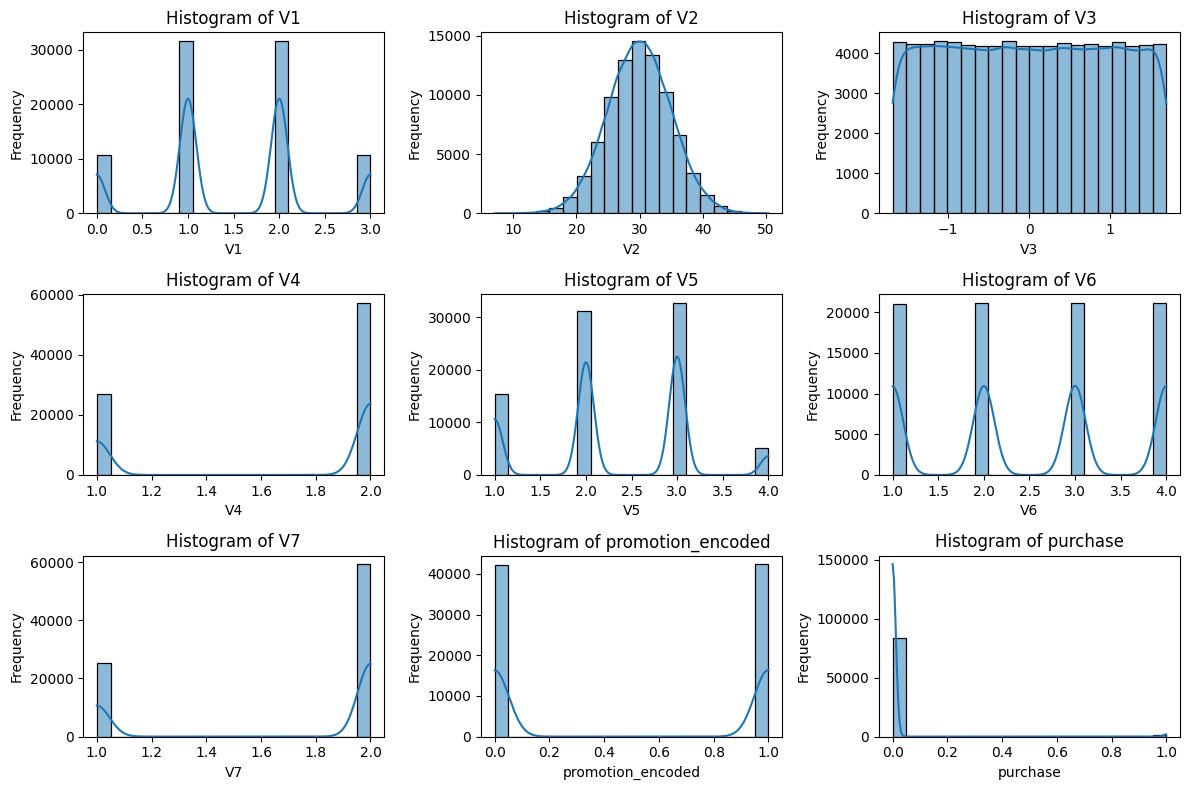

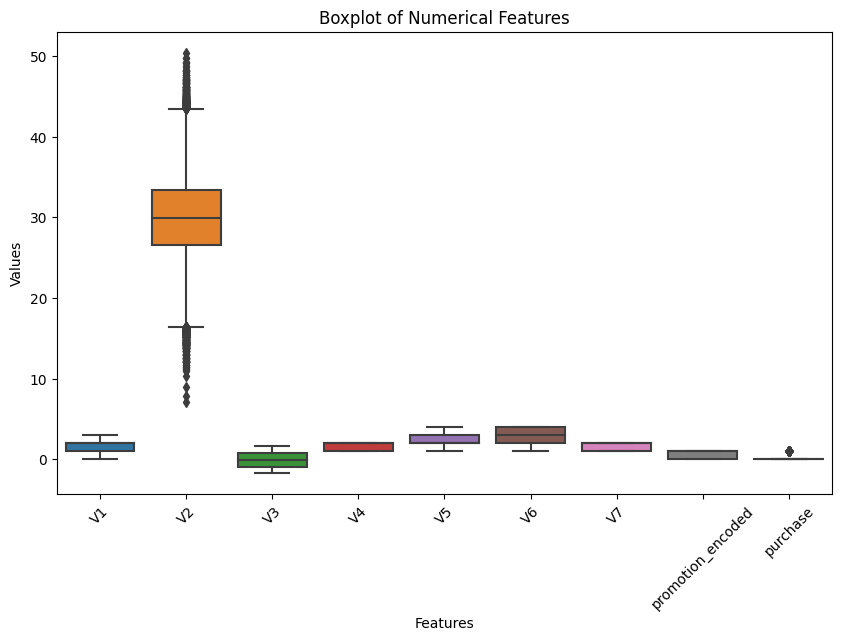

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical features for analysis
numerical_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'promotion_encoded','purchase']

# Plot histograms for numerical features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(train_df[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot boxplot for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_df[numerical_features])
plt.title('Boxplot of Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

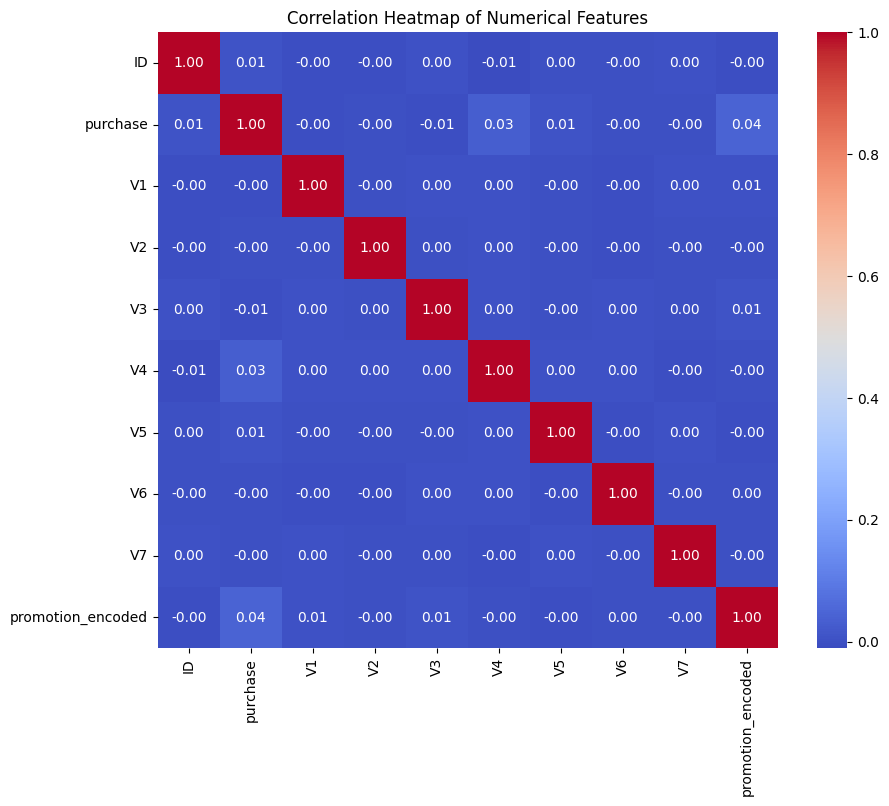

In [36]:
# Compute the correlation matrix
correlation_matrix = train_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

# Add title
plt.title('Correlation Heatmap of Numerical Features')

# Show plot
plt.show()

This is no correlation among any features. Except few mildly correlation between purchase & promotion.

## Relationship between Control & Treatment Group

Proportion of customers in Treatment and Control groups:
Treatment group: 49.89%
Control group: 50.11%

Purchase rates in Treatment and Control groups:
Treatment group: 0.76%
Control group: 1.70%


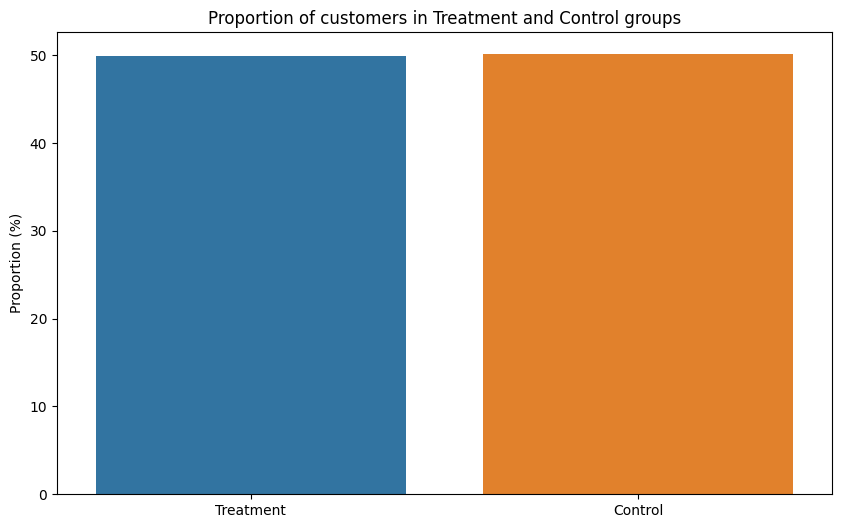

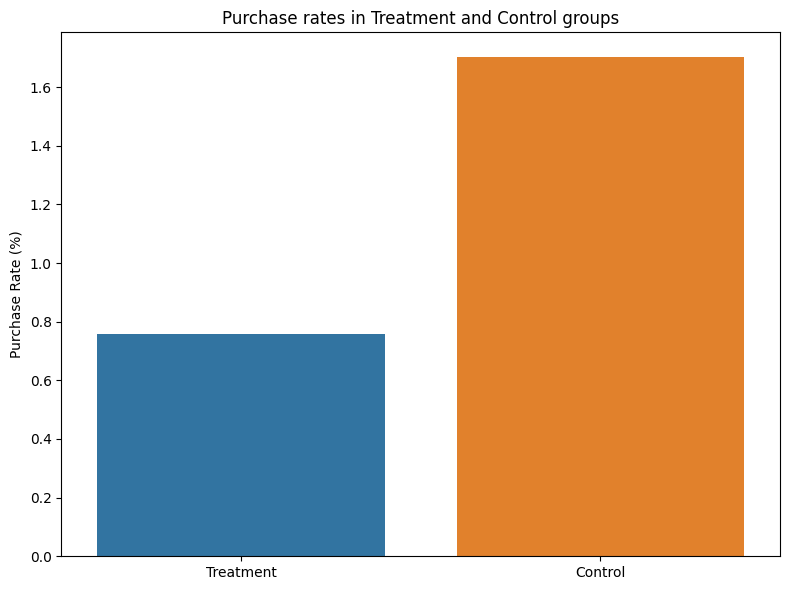

In [40]:
# Calculate the proportion of customers in the treatment and control groups
treatment_count = (train_df['promotion_encoded'] == 0).sum()
control_count = (train_df['promotion_encoded'] == 1).sum()
total_count = len(train_df)

treatment_proportion = (treatment_count / total_count) * 100
control_proportion = (control_count / total_count) * 100

# Print the proportion of customers in each group
print("Proportion of customers in Treatment and Control groups:")
print(f"Treatment group: {treatment_proportion:.2f}%")
print(f"Control group: {control_proportion:.2f}%")

# Compare purchase rates between the treatment and control groups
treatment_purchase_rate = train_df[train_df['promotion_encoded'] == 0]['purchase'].mean() * 100
control_purchase_rate = train_df[train_df['promotion_encoded'] == 1]['purchase'].mean() * 100

# Print the purchase rates in each group
print("\nPurchase rates in Treatment and Control groups:")
print(f"Treatment group: {treatment_purchase_rate:.2f}%")
print(f"Control group: {control_purchase_rate:.2f}%")

# Visualize purchase outcomes by group using bar charts
plt.figure(figsize=(10, 6))

# Bar chart for proportion of customers in each group
sns.barplot(x=['Treatment', 'Control'], y=[treatment_proportion, control_proportion])
plt.title('Proportion of customers in Treatment and Control groups')
plt.ylabel('Proportion (%)')

plt.figure(figsize=(8, 6))
# Bar chart for purchase rates in each group
sns.barplot(x=['Treatment', 'Control'], y=[treatment_purchase_rate, control_purchase_rate])
plt.title('Purchase rates in Treatment and Control groups')
plt.ylabel('Purchase Rate (%)')

plt.tight_layout()
plt.show()


We can clearly see that control group has more purchases overall compared to non promotional treatment.

## Calculating Incremental Response Rate (IRR) & Net Incremental Revenue (NIR):

In [44]:
# Calculate the number of purchasers in the promotion group (treatment)
treatment_purchasers = train_df[train_df['promotion_encoded'] == 0]['purchase'].sum()

# Calculate the total number of customers in the promotion group (treatment)
total_treatment_customers = (train_df['promotion_encoded'] == 0).sum()

# Calculate the number of purchasers in the non-promotional group (control)
control_purchasers = train_df[train_df['promotion_encoded'] == 1]['purchase'].sum()

# Calculate the total number of customers in the non-promotional group (control)
total_control_customers = (train_df['promotion_encoded'] == 1).sum()

# Calculate Incremental Response Rate (IRR)
IRR = (treatment_purchasers / total_treatment_customers) - (control_purchasers / total_control_customers)

# Calculate the total number of purchasers that received the promotion
total_promotion_purchasers = train_df[train_df['promotion_encoded'] == 0]['purchase'].sum()
# Calculate the number of promotions sent out
total_promotions_sent = (train_df['promotion_encoded'] == 0).sum()

# Calculate the number of purchasers who were not given the promotion
control_purchasers = train_df[train_df['promotion_encoded'] == 1]['purchase'].sum()

# Calculate Net Incremental Revenue (NIR)
NIR = (10 * total_promotion_purchasers - 0.15 * total_promotions_sent) - 10 * control_purchasers

print("Net Incremental Revenue (NIR):", NIR)

print("Incremental Response Rate (IRR):", IRR)


Net Incremental Revenue (NIR): -10345.5
Incremental Response Rate (IRR): -0.009454547819772702


## Insights from NIR & IRR :
- The Net Incremental Revenue (NIR) of approximately -10345.5 suggests that the promotion strategy resulted in a loss of revenue. This negative value indicates that the total revenue generated from the promotion, considering the cost of sending out promotions, was less than the revenue generated without the promotion. In other words, the cost of sending out promotions outweighed the additional revenue generated from the promotion, leading to a net loss for the company.

- The Incremental Response Rate (IRR) of approximately -0.0095 suggests that there was a negative impact on the response rate due to the promotion. A negative IRR indicates that fewer customers purchased the product with the promotion compared to if they hadn't received the promotion. In this case, the promotion may have discouraged some customers from making a purchase, resulting in a lower response rate overall.

- Overall, these numbers indicate that the promotion strategy did not yield favorable results in terms of revenue generation and customer response, and adjustments may be needed to improve its effectiveness.